In [15]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import matplotlib.pyplot as plt
import math

In [5]:
df = pd.read_csv("./kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [9]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors']]
Y = df['price']

In [11]:
X.head()

,bedrooms,bathrooms,sqft_living,floors
0,3,1.00,1180,1.0
1,3,2.25,2570,2.0
2,2,1.00,770,1.0
3,4,3.00,1960,1.0
4,3,2.00,1680,1.0


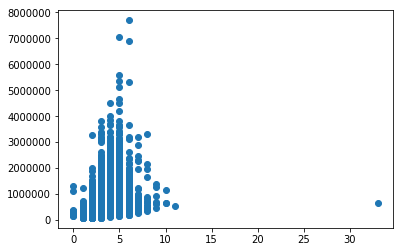

In [16]:
plt.scatter(X['bedrooms'], Y)


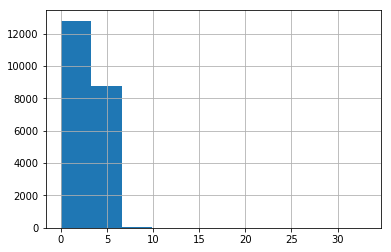

In [17]:
X['bedrooms'].hist()

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

C:\Users\weite\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [36]:
x_train = np.asmatrix(x_train)
x_test = np.asmatrix(x_test)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [38]:
y_train

array([495000., 635000., 382500., ..., 431000., 411000., 699900.])

In [30]:
x_train.size

69160

In [40]:
x_train[:,0]

matrix([[3.],
        [3.],
        [3.],
        ...,
        [3.],
        [4.],
        [4.]])

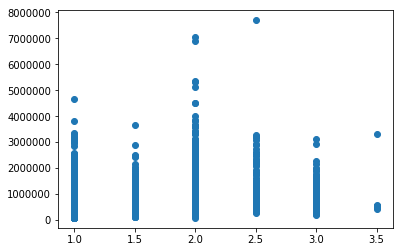

In [46]:
plt.scatter(np.ravel(x_train[:,3]), y_train)

In [47]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

model.coef_

In [48]:
print(model.coef_)

[-56600.74971649   5910.55484141    313.19378476   2453.13912745]


print(model.intercept_)

In [49]:
print(model.intercept_)

65340.24969753978


In [53]:
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

,0,1
0,bedrooms,-56600.749716
1,bathrooms,5910.554841
2,sqft_living,313.193785
3,floors,2453.139127


In [57]:
model.predict([[3,2,2500,2]])

array([695249.85039046])

In [58]:
pred = model.predict(x_test)

In [60]:
(abs(pred - y_test)/y_test).sum()/len(y_test)

0.3535546136605908